In [648]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Current File Name

In [649]:
file_name = "coc1000"

In [650]:
data = pd.read_csv(file_name + ".csv")
print(data.columns)
print(len(data))

Index(['LOC+', ' ACAP', ' AEXP-', ' ARCH', ' CPLX', ' DATA', ' DOCU', ' FLEX',
       ' LTEX', ' PCAP', ' PCON', ' PLEX-', ' PMAT', ' PREC', ' PVOL', ' RELY',
       ' RUSE', ' SCED', ' SITE', ' STOR', ' TEAM', ' TIME', ' TOOL', ' RISK-',
       ' EFFORT-'],
      dtype='object')
1000


In [651]:
data.sample(10)

,LOC+,ACAP,AEXP-,ARCH,CPLX,DATA,DOCU,FLEX,LTEX,PCAP,...,RELY,RUSE,SCED,SITE,STOR,TEAM,TIME,TOOL,RISK-,EFFORT-
434,1147,4,5,3,2,3,2,3,4,3,...,2,5,5,3,4,4,4,3,0,3525
829,585,3,5,4,4,4,3,4,2,5,...,1,5,3,4,5,4,4,4,1,6923
153,1402,3,3,4,3,4,1,3,3,2,...,2,3,3,4,6,6,4,2,4,19664
865,361,3,5,3,4,5,4,2,1,4,...,3,3,1,5,5,6,4,2,6,6636
876,1822,4,1,2,2,2,2,3,2,1,...,5,5,2,4,4,4,4,4,17,59819
402,1750,4,3,4,3,4,3,5,2,5,...,2,3,4,3,4,2,5,4,0,30478
900,428,1,2,3,3,3,1,4,2,4,...,4,3,5,2,4,2,3,4,2,2782
251,1097,5,4,2,1,2,4,4,4,1,...,3,2,3,5,3,2,6,5,6,8018
272,555,4,3,3,5,4,3,5,2,2,...,3,3,5,4,5,2,4,4,3,7546
896,66,2,2,5,5,4,2,2,5,3,...,4,3,3,3,5,2,3,4,3,726


In [652]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,LOC+,ACAP,AEXP-,ARCH,CPLX,DATA,DOCU,FLEX,LTEX,PCAP,...,RELY,RUSE,SCED,SITE,STOR,TEAM,TIME,TOOL,RISK-,EFFORT-
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1013.05,3.07,2.97,3.56,3.55,3.46,3.02,3.49,2.95,2.99,...,2.90,3.97,2.98,2.96,4.57,3.56,4.54,3.00,6.68,30807.50
std,571.35,1.25,1.20,1.48,1.47,0.97,1.22,1.51,1.25,1.22,...,1.21,1.23,1.22,1.21,0.98,1.51,0.96,1.25,6.37,33883.81
min,4.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,...,1.00,2.00,1.00,1.00,3.00,1.00,3.00,1.00,0.00,19.00
25%,520.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,...,2.00,3.00,2.00,2.00,4.00,2.00,4.00,2.00,2.00,7920.50
50%,1060.50,3.00,3.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,...,3.00,4.00,3.00,3.00,5.00,4.00,5.00,3.00,5.00,19642.00
75%,1494.50,4.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00,4.00,...,4.00,5.00,4.00,4.00,5.00,5.00,5.00,4.00,10.00,42636.50
max,1999.00,5.00,5.00,6.00,6.00,5.00,5.00,6.00,5.00,5.00,...,5.00,6.00,5.00,5.00,6.00,6.00,6.00,5.00,42.00,234541.00


In [655]:
data[[' ACAP', ' ARCH', ' CPLX', ' DATA', ' DOCU', ' FLEX',
       ' LTEX', ' PCAP', ' PCON', ' PMAT', ' PREC', ' PVOL', ' RELY',
       ' RUSE', ' SCED', ' SITE', ' STOR', ' TEAM', ' TIME', ' TOOL']].describe().loc[['mean','std', 'min', '25%', '50%', '75%', 'max']]

,ACAP,ARCH,CPLX,DATA,DOCU,FLEX,LTEX,PCAP,PCON,PMAT,PREC,PVOL,RELY,RUSE,SCED,SITE,STOR,TEAM,TIME,TOOL
mean,3.07,3.56,3.55,3.46,3.02,3.49,2.95,2.99,2.97,3.51,3.50,3.54,2.90,3.97,2.98,2.96,4.57,3.56,4.54,3.00
std,1.25,1.48,1.47,0.97,1.22,1.51,1.25,1.22,1.17,1.50,1.50,0.97,1.21,1.23,1.22,1.21,0.98,1.51,0.96,1.25
min,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,3.00,1.00,3.00,1.00
25%,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,2.00,4.00,2.00,4.00,2.00
50%,3.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,4.00,3.00,3.00,5.00,4.00,5.00,3.00
75%,4.00,5.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00,4.00,5.00,5.00,5.00,4.00
max,5.00,6.00,6.00,5.00,5.00,6.00,5.00,5.00,5.00,6.00,6.00,5.00,5.00,6.00,5.00,5.00,6.00,6.00,6.00,5.00


### Find the Columns under study

In [583]:
final_columns = []
categorical_columns = []
for col in data.columns:
    if col.strip().endswith("+") or col.strip().endswith("-") or col.strip().endswith("X"):
        continue
    if col.strip()[0].islower():
        categorical_columns.append(col)
        
    final_columns.append(col) 
print("Final columns:", final_columns)    
print("Categorical columns:", categorical_columns)  

sample_data = data.loc[:, final_columns]

Final columns: ['maker', ' type', ' Air_Bags_standard', ' Drive_train_type', ' Number_of_cylinders', ' Engine_size', ' Horsepower', ' RPM', ' Engine_revolutions_per_mile', ' manual_transmission_available', ' Fuel_tank_capacity', ' Passenger_capacity', ' Length', ' Wheelbase', ' Width', ' U-turn_space', ' Rear_seat_room', ' Luggage_capacity', ' domestic']
Categorical columns: ['maker', ' type', ' manual_transmission_available', ' domestic']


### Apply one hot encoding for the categorical columns

In [576]:
def encode_and_bind(original_dataframe, feature_to_encode):
    original_dataframe[feature_to_encode] = sample_data[feature_to_encode].astype(dtype = str, errors = 'ignore')
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

for feature in categorical_columns:
    sample_data = encode_and_bind(sample_data, feature)
    
sample_data = sample_data.dropna()
sample_data.head(10)

,Aq_strength,Bframes,Qcomp,Qp,Ref,Rc_lookahead,B_bias,Threads,Keyint,Crf,...,Seek,Ipratio,no_mbtree_0,no_mbtree_1,no_asm_0,no_asm_1,no_cabac_0,no_cabac_1,no_scenecut_0,no_scenecut_1
0,1.0,3,0.6,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
1,1.0,3,0.6,23,3,40,-100,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
2,1.0,3,0.6,23,3,200,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
3,1.0,1,1.0,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
4,1.0,1,0.0,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
5,1.0,3,1.0,23,3,40,100,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
6,1.0,3,0.0,23,3,40,100,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
7,1.0,3,1.0,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
8,1.0,3,0.0,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0
9,1.0,25,1.0,23,3,40,0,4,250,23.0,...,0,1.4,1,0,0,1,1,0,1,0


In [577]:

#sample_data.drop('sMOOTHER_1', axis=1, inplace=True)
#sample_data.drop('cYCLE_1', axis=1, inplace=True)
# sample_data.drop('team_vh', axis=1, inplace=True)
# sample_data.drop('site_n', axis=1, inplace=True)
# sample_data.drop('ruse_n', axis=1, inplace=True)
# sample_data.drop('docu_n', axis=1, inplace=True)
# sample_data.drop('pcon_n', axis=1, inplace=True)

### Normalize the column values

In [578]:
for feature_name in sample_data.columns:
    sample_data[feature_name] = sample_data[feature_name].apply(pd.to_numeric,errors='coerce')
    sample_data = sample_data[~sample_data[feature_name].isnull()]

sample_data_df = (sample_data - sample_data.min()) / (sample_data.max() - sample_data.min())

#sample_data_df = sample_data_df.dropna() 

print(sample_data_df.head(10))

   Aq_strength   Bframes     Qcomp       Qp  Ref  Rc_lookahead  B_bias  \
0     0.052632  0.083333  0.054545  0.45098  0.3      0.156627     0.5   
1     0.052632  0.083333  0.054545  0.45098  0.3      0.156627     0.0   
2     0.052632  0.083333  0.054545  0.45098  0.3      0.799197     0.5   
3     0.052632  0.000000  0.090909  0.45098  0.3      0.156627     0.5   
4     0.052632  0.000000  0.000000  0.45098  0.3      0.156627     0.5   
5     0.052632  0.083333  0.090909  0.45098  0.3      0.156627     1.0   
6     0.052632  0.083333  0.000000  0.45098  0.3      0.156627     1.0   
7     0.052632  0.083333  0.090909  0.45098  0.3      0.156627     0.5   
8     0.052632  0.083333  0.000000  0.45098  0.3      0.156627     0.5   
9     0.052632  1.000000  0.090909  0.45098  0.3      0.156627     0.5   

   Threads    Keyint           Crf  ...  Seek   Ipratio  no_mbtree_0  \
0  0.03125  0.249249  2.600000e-14  ...   0.0  0.073684          1.0   
1  0.03125  0.249249  2.600000e-14  ...  

### Find the epsion value

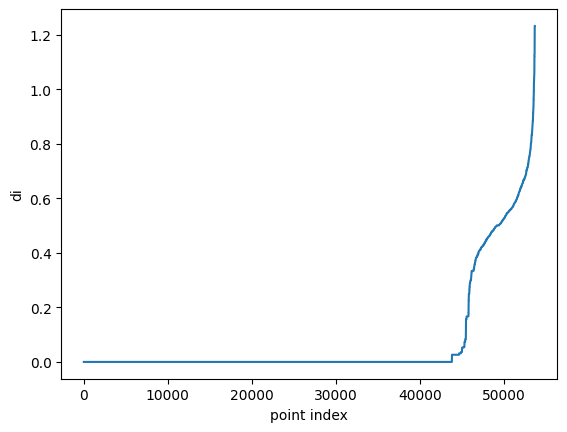

In [579]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors= 2 * len(final_columns))
neighbors_fit = neighbors.fit(sample_data_df)
distances, indices = neighbors_fit.kneighbors(sample_data_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("di")
plt.xlabel("point index")
plt.plot(distances)
plt.savefig(file_name + ".pdf", format="pdf", bbox_inches="tight")